In [2]:
#Import all the dependencies
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
# import the metrics class
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....


In [4]:
df_sub = df.loc[df.category.isin([ "Control", "ProbableAD"])]
df_sub

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....
5,086-2.cha,NaN,female,NaN,1,1,0,0,0,1,Control,well the boy has climbed up on the stool to g...
6,267-2.cha,54.0,female,30.0,2,0,0,0,0,1,Control,mother is drying the dishes and looking out t...
7,118-4.cha,NaN,female,NaN,1,0,0,0,0,0,Control,well the water's running over outta out the s...
8,166-2.cha,NaN,male,NaN,1,0,0,0,0,0,Control,all of the things that I see going on ? well ...
9,105-1.cha,57.0,female,27.0,0,0,0,0,0,0,Control,well the mother is drying the dishes . the s...


In [5]:
df_sub["data"].tolist() #collect all interview transcripts into a list

["  there's a cookie jar on the shelf . and the little boy's up on a stool . and the stool is about to fall he's about to fall . the stool's about to turn over . little girl in the picture's reaching for the cookie . mother is washing dishes . the water's running and running over onto the floor . she she has a plate in her hand and a towel . she's drying a plate . two cups are sitting on a counter and also a plate . you can see out through the kitchen window to another part of the house and a a walkway away from the house . you can see a window across in the other part of the house, the roof with a tree, that there are there are curtains on the windows .  I think that's did I cover it all ? yeah . ",
 " the kids are in the cookies . the stool is falling over . the mother's spilling the water and also drying the dishes . and the wind might be blowing the curtains . and the water's running . I can't tell is anything going on outside or not . I guess that's all I see . that's not very man

In [6]:
#data cleaning
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]") #delete all puntuations
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)") #put space back in
NO_SPACE = ""
SPACE = " "

#data cleaning function
def preprocess_interviews(interviews):
    interviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in interviews]
    interviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in interviews]
    
    return interviews #return processed data

interviews_train_clean = preprocess_interviews(df_sub["data"].tolist()) #put all cleaned data in a list

In [7]:
interviews_train_clean[5] #take a look

' well the boy has climbed up on the stool to get some cookies from the cookie jar  and hes giving his sister the cookies  and she is she isnt actually eating one but she has her finger her hand up to her mouth  but the stool is going to fall over  and the mother is washing the dishes  shes really wiping a dish and the sink is running over them   the dishes are on the sink  you wanna know that sort of thing  just whats going thats all that i well that all that i see   shes standing in the water too  '

In [8]:
#Count Vectorizer
cv = CountVectorizer(binary=True) 
cv.fit(interviews_train_clean) #fit the data
X = cv.transform(interviews_train_clean) 

In [9]:
def get_top_n_words(corpus, n=None):

    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

print(get_top_n_words(interviews_train_clean[:244], n=None))

[('the', 2944), ('and', 1134), ('is', 1107), ('to', 489), ('cookie', 443), ('on', 438), ('in', 384), ('her', 304), ('sink', 296), ('dishes', 286), ('shes', 283), ('stool', 270), ('over', 261), ('water', 254), ('jar', 242), ('it', 235), ('thats', 221), ('boy', 220), ('little', 218), ('of', 216), ('mother', 214), ('see', 208), ('hes', 205), ('girl', 202), ('that', 197), ('drying', 192), ('window', 181), ('are', 180), ('has', 177), ('for', 174), ('there', 164), ('cookies', 161), ('running', 160), ('reaching', 158), ('theres', 154), ('his', 154), ('out', 151), ('hand', 150), ('up', 149), ('you', 142), ('open', 142), ('she', 141), ('standing', 139), ('be', 138), ('floor', 137), ('about', 134), ('off', 132), ('falling', 123), ('outof', 121), ('one', 121), ('action', 120), ('all', 117), ('or', 117), ('overflowing', 114), ('with', 110), ('dont', 109), ('its', 106), ('getting', 106), ('like', 106), ('going', 103), ('washing', 98), ('looks', 98), ('waters', 93), ('fall', 86), ('curtains', 86), (

In [10]:
print(get_top_n_words(interviews_train_clean[244:], n=None))

[('the', 2359), ('and', 1141), ('is', 618), ('on', 403), ('to', 368), ('shes', 326), ('cookie', 310), ('it', 300), ('in', 286), ('dishes', 277), ('over', 274), ('that', 262), ('jar', 246), ('hes', 241), ('little', 225), ('water', 217), ('she', 187), ('her', 186), ('this', 185), ('sink', 184), ('boy', 179), ('cookies', 177), ('of', 177), ('up', 175), ('stool', 173), ('there', 164), ('well', 162), ('girl', 158), ('what', 157), ('see', 156), ('his', 155), ('thats', 154), ('floor', 146), ('out', 143), ('theres', 142), ('you', 137), ('its', 135), ('oh', 129), ('drying', 128), ('or', 126), ('all', 125), ('here', 123), ('for', 122), ('dont', 121), ('he', 120), ('down', 117), ('running', 117), ('off', 113), ('washing', 111), ('mother', 109), ('gonna', 108), ('get', 103), ('like', 100), ('going', 100), ('falling', 100), ('some', 98), ('know', 98), ('getting', 96), ('fall', 94), ('has', 93), ('one', 92), ('waters', 86), ('at', 82), ('be', 82), ('are', 79), ('but', 76), ('him', 76), ('looks', 76)

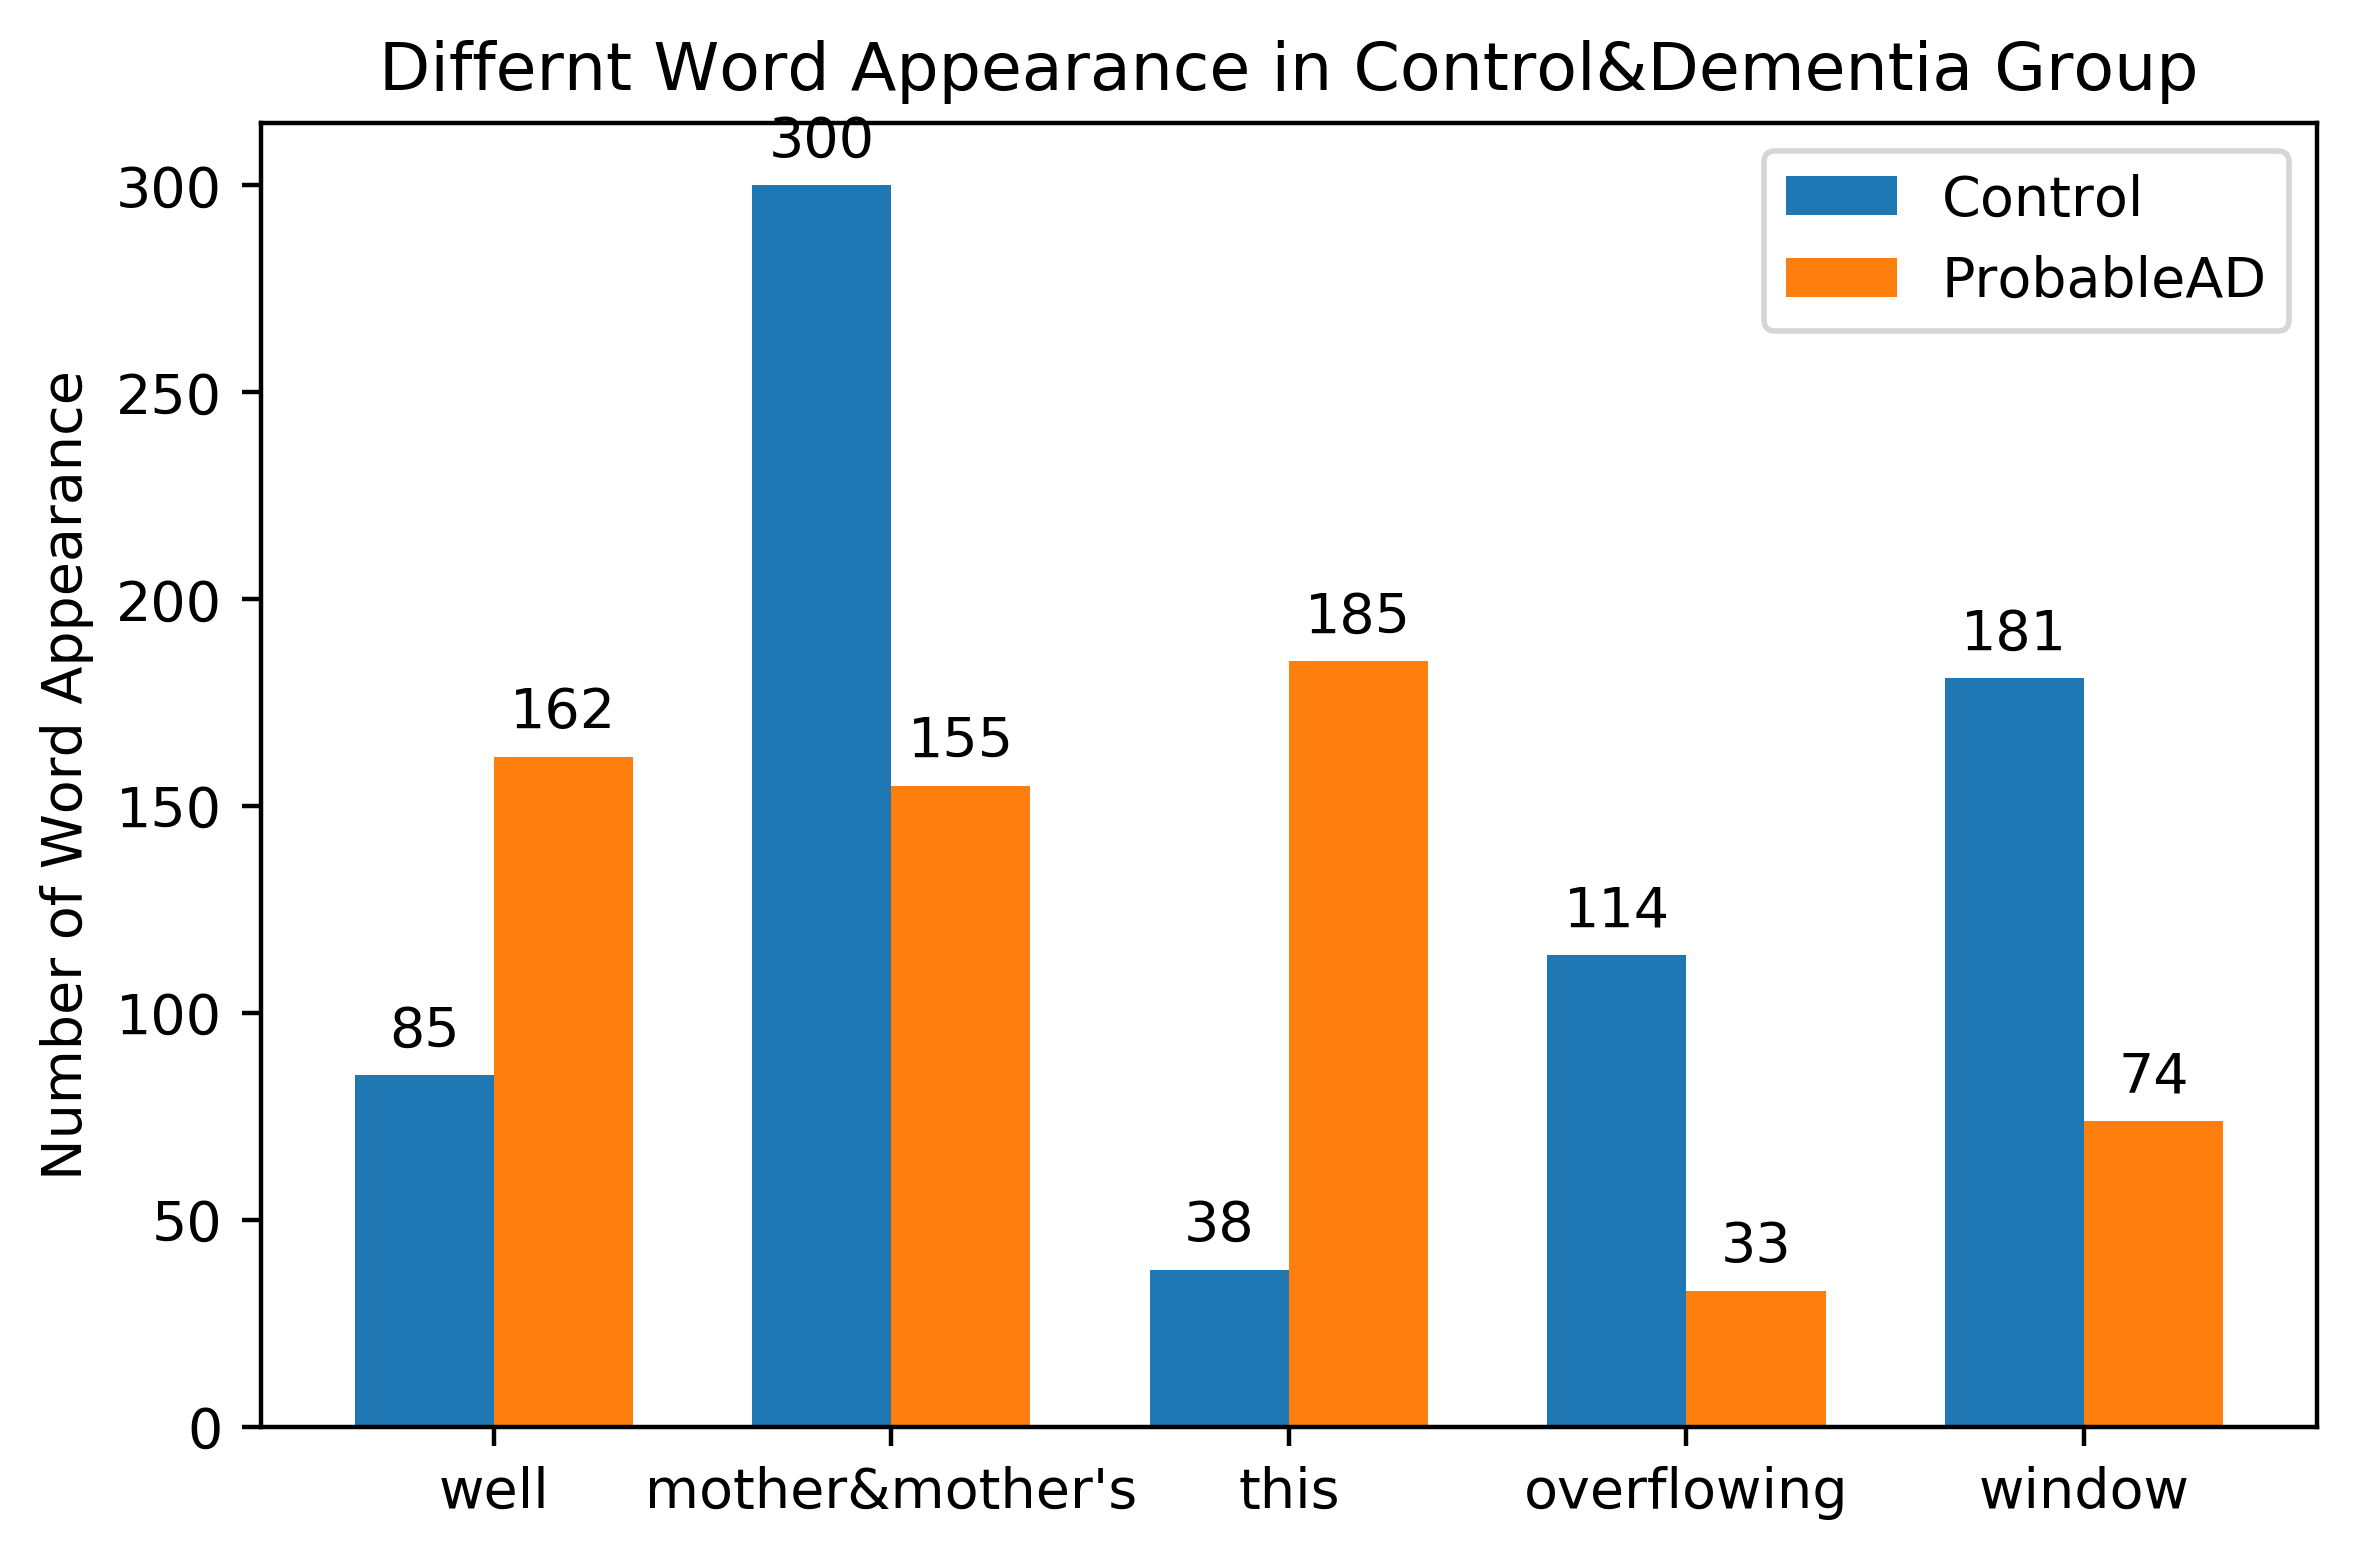

<Figure size 6000x4000 with 0 Axes>

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['well', "mother&mother's", 'this', 'overflowing', 'window']
control_means = [85, 300, 38, 114, 181]
dementia_means = [162, 155, 185, 33, 74]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(dpi = 400)
rects1 = ax.bar(x - width/2, control_means, width, label='Control')
rects2 = ax.bar(x + width/2, dementia_means, width, label='ProbableAD')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Word Appearance')
ax.set_title('Differnt Word Appearance in Control&Dementia Group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.figure(dpi = 1000)
fig.tight_layout()
plt.show()

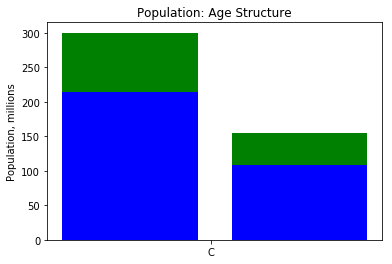

In [11]:
N = 1
word1 = (300)
word2 = (214)

ind = np.arange(N) + .15 # the x locations for the groups
width = 0.20      # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, word1, width, color='g') 
rects2 = ax.bar(ind, word2, width, color='b') 

word3 = (155)
word4 = (109)

xtra_space = 0.05
rects3 = ax.bar(ind + width + xtra_space , word3, width, color='g')
rects4 = ax.bar(ind + width + xtra_space , word4, width, color='b') 

# add some text for labels, title and axes ticks
ax.set_ylabel('Population, millions')
ax.set_title('Population: Age Structure')

ax.set_xticks(ind+width-xtra_space-0.03) #ind+width+xtra_space
ax.set_xticklabels( ('Control') )

plt.show()

In [12]:
X.toarray() #turn X into an array list
y_list = df_sub['category'] #make a list of categories

In [29]:
#train test split and its function with the parameter # of times you want to see the validation accuracy
#also prints out maximum accuracy and its corresponding c each term, mean, and standard deviation
target = [1 if i == 'ProbableAD' else 0 for i in y_list] #这里要写啥
def run_classification_model(num_of_runs, X, target): #the function returns a list of test accuracy
    test_accuracy = [] #the list of accuracy should be empty before each time the function runs
    for i in range(num_of_runs): #for loop that runs exact number of times requested
        print("run " + str(i)) #print out which run it is
        validation_accuracy = [] #the list of validation accuracy, the max will be drawn from it at the end
        X_train, X_test, y_train, y_test = train_test_split( #get a test set of 10% of the data, and a train set of 90%
            X, target, test_size = 0.1
        )

        X_train, X_val, y_train, y_val = train_test_split( #get a train set of 80%, and a validation set of 10%
            X_train, y_train, train_size = 0.89
        )
        
        c_list = [0.099, 0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 1e10] #list of hyperparameters
        for c in c_list: #test each c

            lr = LogisticRegression(C=c) #imput the c
            lr.fit(X_train, y_train) #fitting
            
            
            current_validation_accuracy = accuracy_score(y_val, lr.predict(X_val)) #calculate validation accuracy
            validation_accuracy.append(current_validation_accuracy) #append the list
            
        max_accuracy = max(validation_accuracy) #draw the maximum of validation accuracy
        index = np.argmax(validation_accuracy) #take the index of the maximum
        c_optim = c_list[index] #take the corresponding c
        print ("max validation accuracy is {} and optimal c is {}".format(max_accuracy, c_optim)) #print out the results
 
        # apply the best c to train the model
        lr_optim = LogisticRegression(C=c_optim) #try the best c on test set
        lr_optim.fit(X_train, y_train) #fitting
        current_test_accuracy = accuracy_score(y_test, lr_optim.predict(X_test)) #calculate test accuracy
        test_accuracy.append(current_test_accuracy) #append test accuracy list
    return test_accuracy #return the list
        
test_accuracy = run_classification_model(5, X, target) #call the function
mean_accuracy = np.mean(test_accuracy) #take the mean of test accuracy
std_accuracy = np.std(test_accuracy) #take standard deviation
print(test_accuracy)
print("Mean:",mean_accuracy)
print("Std:",std_accuracy)

run 0
max validation accuracy is 0.8958333333333334 and optimal c is 0.099
run 1
max validation accuracy is 0.8333333333333334 and optimal c is 10
run 2
max validation accuracy is 0.9166666666666666 and optimal c is 1
run 3
max validation accuracy is 0.875 and optimal c is 10
run 4
max validation accuracy is 0.8541666666666666 and optimal c is 0.01
[0.6458333333333334, 0.7083333333333334, 0.875, 0.7291666666666666, 0.875]
Mean: 0.7666666666666667
Std: 0.09260879487872027


In [41]:
#not sure do we still need it or not
target = [1 if i == 'ProbableAD' else 0 for i in y_list]

X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size = 0.1
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size = 0.89
)

for c in [0.099, 0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 1e10]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Validation Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))
    

Validation Accuracy for C=0.099: 0.8333333333333334
Validation Accuracy for C=0.01: 0.8333333333333334
Validation Accuracy for C=0.05: 0.8333333333333334
Validation Accuracy for C=0.25: 0.8541666666666666
Validation Accuracy for C=0.5: 0.8333333333333334
Validation Accuracy for C=1: 0.8333333333333334
Validation Accuracy for C=10: 0.8541666666666666
Validation Accuracy for C=100: 0.8958333333333334
Validation Accuracy for C=1000: 0.8958333333333334
Validation Accuracy for C=10000000000.0: 0.8958333333333334


In [15]:
X_val

<48x1691 sparse matrix of type '<class 'numpy.int64'>'
	with 2403 stored elements in Compressed Sparse Row format>

In [19]:
# Create data
c_values = []
c_values_texts = []
accuracy_values = []
N = 500
for c in [0.099, 0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 1e10]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    c_values.append(c)
    c=str(c)
    c_values_texts.append("c="+c)
    accuracy_values.append(accuracy_score(y_val, lr.predict(X_val)))

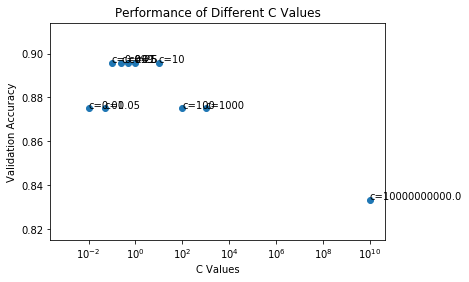

In [15]:
y = accuracy_values
z = c_values
n = c_values_texts

fig, ax = plt.subplots()
ax.scatter(z, y)
plt.ylabel('Validation Accuracy')
plt.xlabel('C Values')
plt.title("Performance of Different C Values")
plt.xscale("log")

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

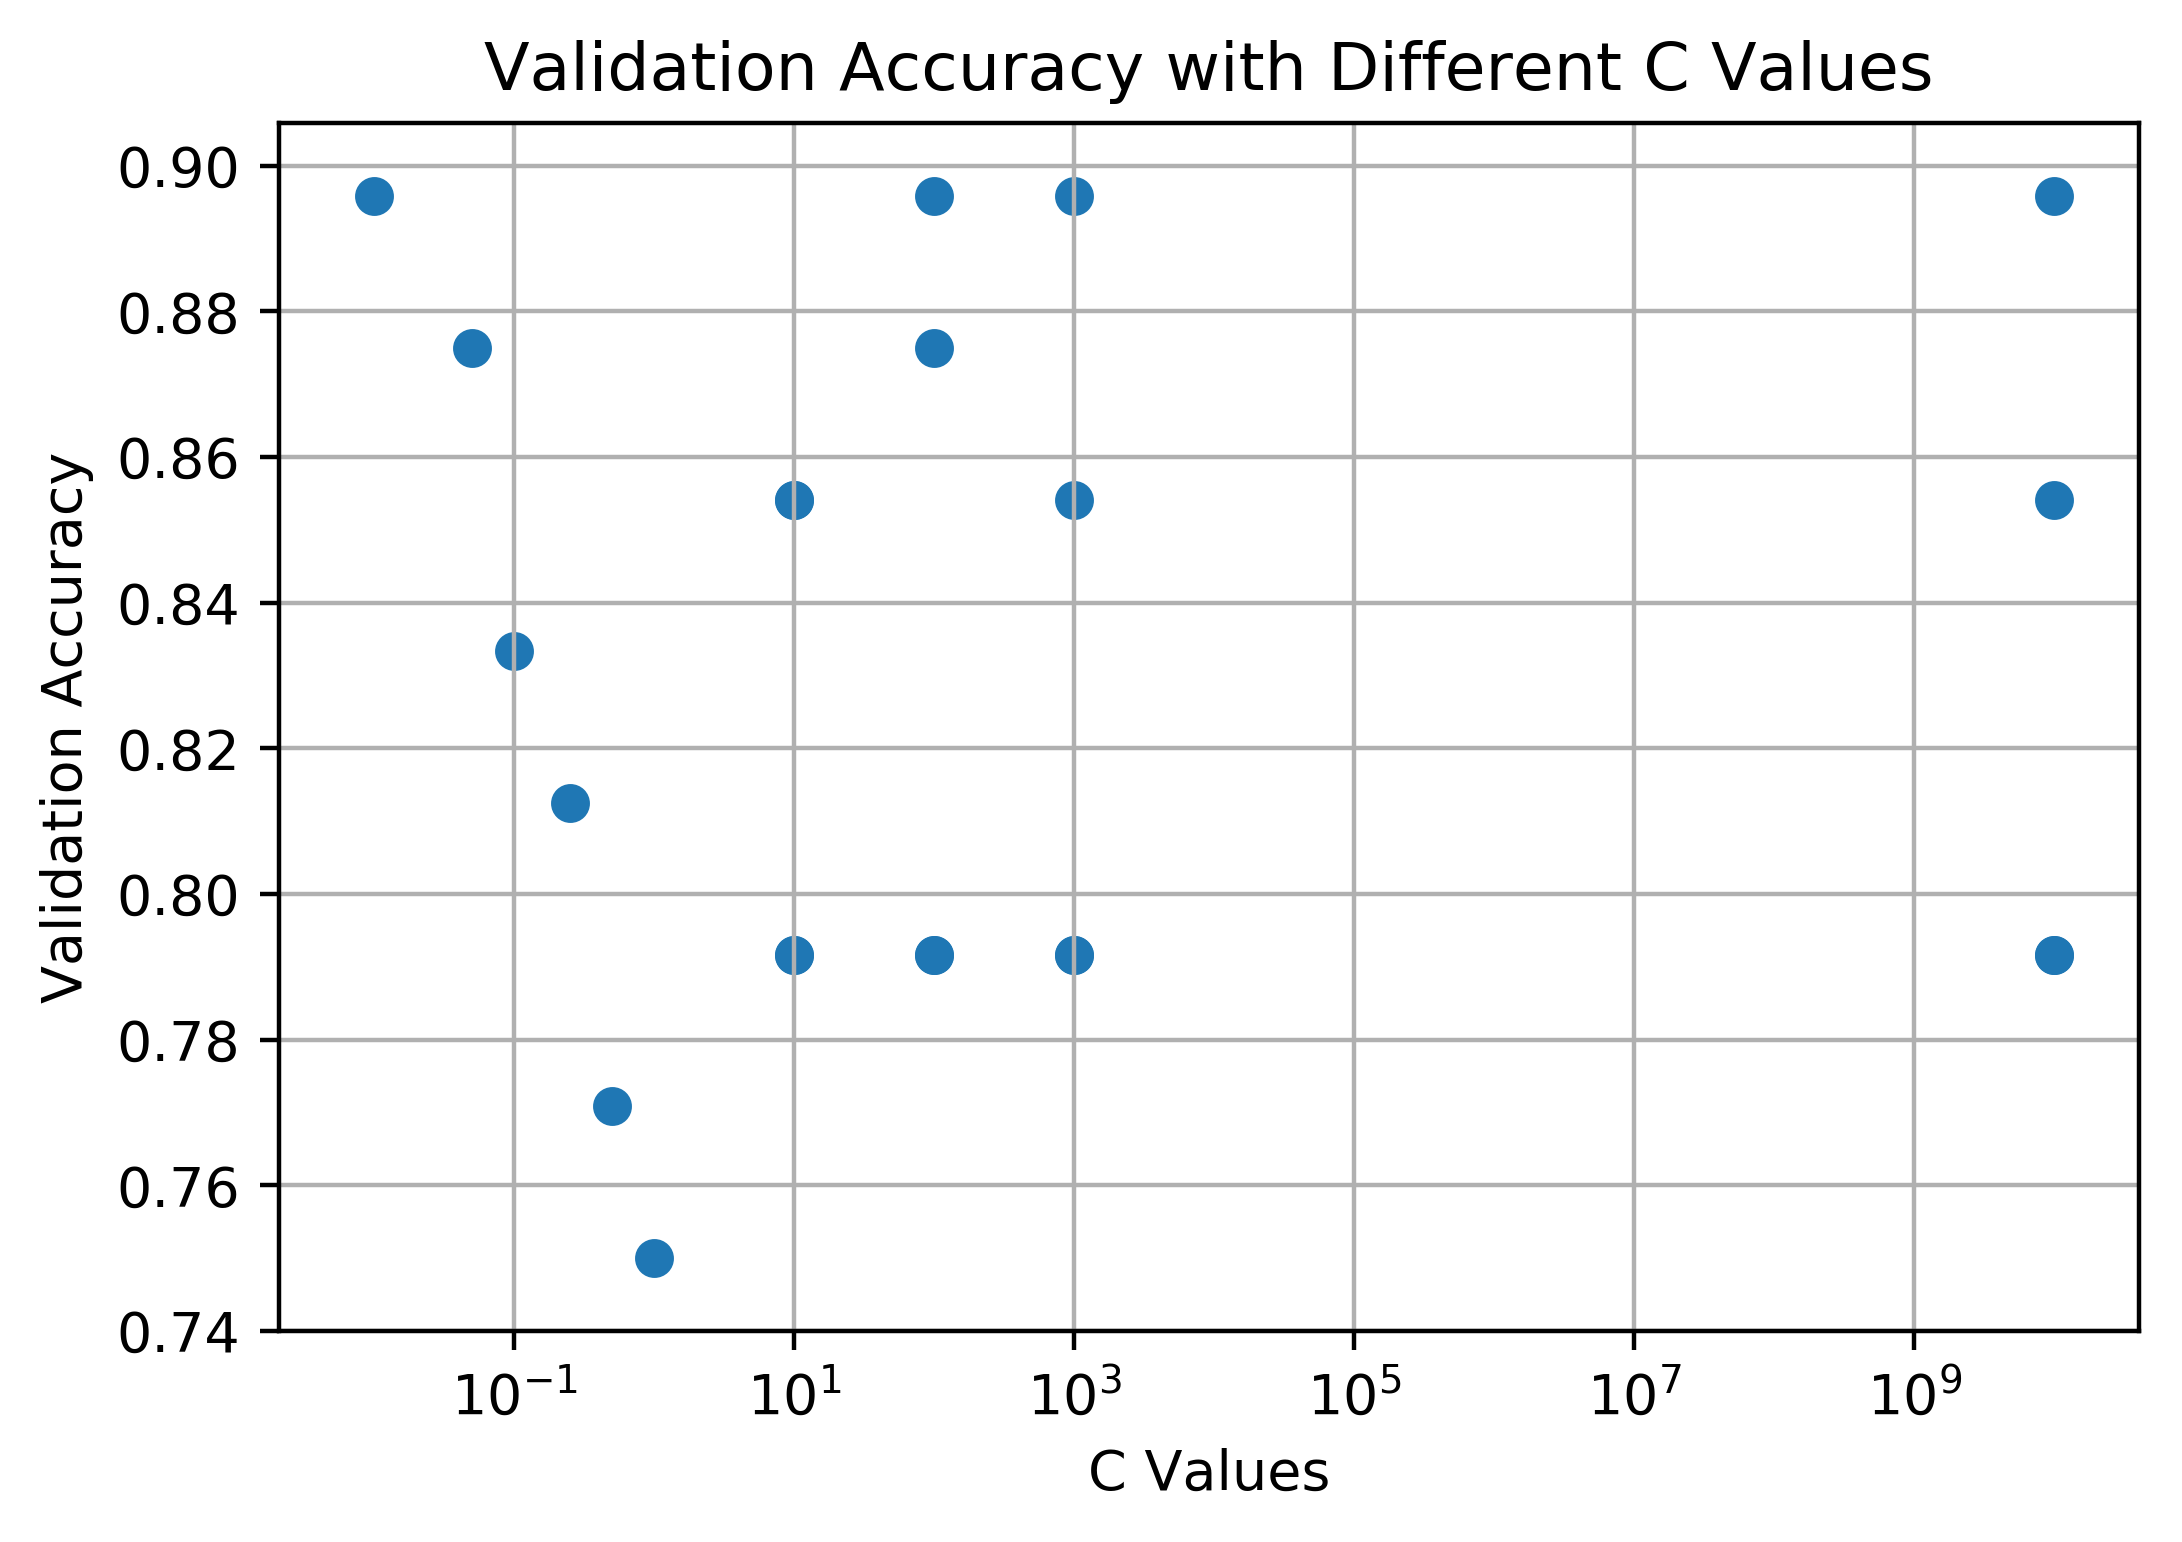

In [42]:
for c in [10, 100, 1000, 1e10]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    c_values.append(c)
    c=str(c)
    c_values_texts.append("c="+c)
    accuracy_values.append(accuracy_score(y_val, lr.predict(X_val)))

y = accuracy_values
z = c_values
n = c_values_texts

fig, ax = plt.subplots(dpi = 400)
ax.scatter(z, y)
plt.ylabel('Validation Accuracy')
plt.xlabel('C Values')
plt.title('Validation Accuracy with Different C Values')
plt.grid()
# fig, ax = plt.subplots(dpi = 400)
plt.xscale("log")

# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i], y[i]))

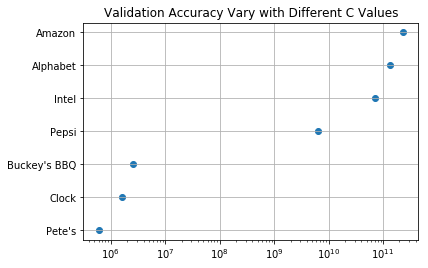

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = { 
        "Pete's":           600000,
        "Clock":           1600000,
        "Buckey's BBQ":    2600000,
        "Pepsi":        6466000000,
        "Intel" :      70848000000,	
        "Alphabet":    136819000000,
        "Amazon":      232887000000	
        }
        
df = pd.DataFrame.from_dict(data,orient='index',columns=['C Values'])
dg =pd.to_numeric(df['C Values'])
dc = pd.Series(dg.index.values.tolist()).to_frame('Accuracies') 
dat = df.assign(Accuracies=dc.values)

data = dat.sort_values(by=['C Values'])
 
plt.scatter(data['C Values'],data['Accuracies'])
plt.grid()
plt.title('Validation Accuracy Vary with Different C Values')
plt.xscale("log")
plt.show()